In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter
# svg output in plots
import tqdm as tqdm
from itertools import chain
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Parameters

In [18]:
# Load data
df = pd.read_pickle(r"../Dataset/dataframe.pkl")
df = df[df["Time"] > 1950]

df_i = df.explode("Simplices").reset_index()
authors = df_i["Simplices"].unique()
N_a = len(authors)
print("Number of authors:", N_a)

Number of authors: 1242372


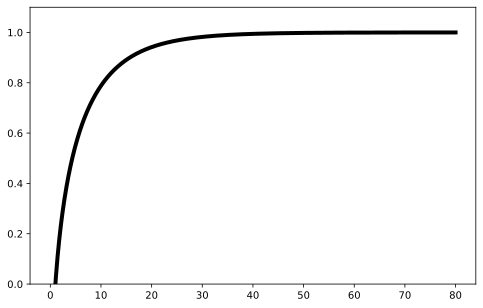

In [19]:
### Academic age distribution
from scipy.special import gammaincc
fig, ax = plt.subplots(figsize=(8, 5))
a = 0.6
b = 0.1
def pdf(x,a,b):
    norm = (b**(a-1))*gammaincc(1-a,b)
    return (1/norm)*np.exp(-b*x)*x**(-a)

def cdf(x,a,b):
    norm = gammaincc(1-a,b)
    return (1/norm)*(gammaincc(1-a,b) - gammaincc(1-a,b*x))

x_life = np.linspace(0,80,1001)
f_life = cdf(x_life,a,b)
x_life[1000] = 80
f_life[1000] = 1
plt.plot(x_life,f_life,color="black",linestyle="-",linewidth=4)
plt.ylim(0,1.1)

ages = []
for i in range(len(authors)):
    i_a = np.random.rand()
    age = np.where(f_life > i_a)[0][0]
    ages.append(age)

In [20]:
t0 = 1950
tf = 1970

# Parameters
N = 25 # Maximum number of orders
r = (np.log(10**5 - 10**3))/60 # simplices x year
N_simplices = 1000 # Number of simplices at t0

ti = t0

simplices = []
time = []

def p(x):
    return 1/(1+x)

def dist_order(order,age,N):
    alpha = 0.5*(1 + np.tanh(0.5*(age-10)))
    Z = np.sum([np.exp(-alpha*o) for o in range(N)])
    e = np.exp(-alpha*order)/Z
    lam = N/2
    Pois = np.exp(-lam)*lam**(order)/np.math.factorial(order)
    return alpha*e + (1-alpha)*Pois

w_t = 0
while ti < tf:
    # Compute total rate:
    W = r*N_simplices
    
    # Compute next event time
    At = - np.log(np.random.rand())/W

    ti = ti + At
    w_t = w_t + At

    # Choose main author according to the age
    i_a = np.random.randint(0,N_a)
    while np.random.rand() > p(ages[i_a]):
        i_a = np.random.randint(0,N_a)
    
    # i_a is the main author
    age = ages[i_a]
    o_i = np.random.choice(range(N),p=[dist_order(order,age,N) for order in range(N)]/np.sum([dist_order(order,age,N) for order in range(N)]))
    
    if o_i > 0:
        possible_collaborators_index = [i for i in range(N_a) if i != i_a]
        # random choice from authors to select the collaborators
        i_c = np.random.randint(0,N_a-1,o_i)  # Here the "preferential attachment" could be implemented
        collaborators = [authors[i] for i in i_c]
        simplices.append([authors[i_a]] + collaborators)
        time.append(ti)
    else:
        simplices.append([authors[i_a]])
        time.append(ti)
    if w_t > 1:
        N_simplices = len(simplices)
        print(ti,N_simplices)
        w_t = 0

1951.00003840851 187
1952.0541585284834 222
1953.0577903139092 261
1954.0719255154097 314
1955.1135001463022 383
1956.1185628384849 468
1957.1302512732275 573
1958.1326799956755 673
1959.1361582257025 800
1960.136488436384 978
1961.1386585417622 1149
1962.1389881424345 1365
1963.140301835379 1617
1964.144900530631 1912
1965.1468791838488 2282
1966.1478742020367 2719
1967.1502107396088 3274
1968.1507297851003 3890
1969.1510823151216 4661


In [21]:
simplices

[[351347.0],
 [642466.0],
 [663961.0, 1076370.0],
 [5089.0, 991910.0],
 [1181759.0, 1251636.0],
 [173500.0],
 [54430.0, 665961.0, 728198.0],
 [79576.0],
 [996973.0],
 [1226706.0],
 [145336.0],
 [845378.0,
  916168.0,
  902181.0,
  180580.0,
  797574.0,
  602782.0,
  1236137.0,
  1250534.0,
  195235.0,
  49148.0,
  558837.0,
  108576.0,
  436441.0,
  352651.0,
  795316.0,
  792720.0],
 [933910.0],
 [1260503.0],
 [608133.0, 1056263.0],
 [767743.0, 158458.0],
 [588293.0],
 [1229591.0],
 [48050.0],
 [277348.0, 681025.0, 634819.0],
 [284735.0],
 [604356.0],
 [441118.0, 1141393.0, 850313.0, 937693.0, 1054900.0],
 [30809.0],
 [6150.0],
 [878173.0],
 [628385.0],
 [472517.0],
 [133469.0, 1062999.0],
 [1051365.0, 594044.0],
 [1241731.0],
 [956133.0],
 [515732.0],
 [534913.0],
 [1116255.0],
 [953374.0, 121148.0, 640323.0],
 [330878.0, 428941.0],
 [692037.0],
 [341983.0, 1117934.0],
 [959473.0],
 [777949.0],
 [552496.0],
 [94646.0, 1148141.0],
 [225729.0, 507410.0],
 [141734.0],
 [957256.0],
 [666